In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
test_file_path = "/kaggle/input/glasses-or-no-glasses/test.csv"
train_file_path = "/kaggle/input/glasses-or-no-glasses/train.csv"
image_base_path = "/kaggle/input/glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-"

In [3]:
trainDf = pd.read_csv(train_file_path)[['id','glasses']]
testDf = pd.read_csv(test_file_path)[['id']]


In [4]:
trainDf=trainDf.assign(path='')
display(trainDf)
testDf=testDf.assign(path='')
display(testDf)

,id,glasses,path
0,1,0,
1,2,1,
2,3,1,
3,4,0,
4,5,0,
...,...,...,...
4495,4496,0,
4496,4497,0,
4497,4498,1,
4498,4499,1,


,id,path
0,4501,
1,4502,
2,4503,
3,4504,
4,4505,
...,...,...
495,4996,
496,4997,
497,4998,
498,4999,


In [5]:
trainDf['path']=trainDf['id'].apply(lambda x: image_base_path+str(x)+'.png').tolist()
trainDf=trainDf[['id','path','glasses']]


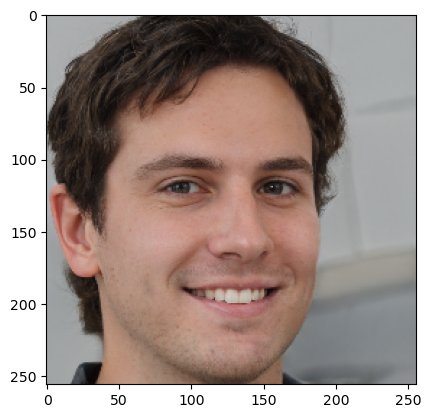

In [6]:
sample_img = mpimg.imread(trainDf.loc[0,"path"])
sample_img = cv2.resize(sample_img,(256,256))
plt.imshow(sample_img)

In [7]:
testDf['path']=testDf['id'].apply(lambda x: image_base_path+str(x)+'.png').tolist()
testDf=testDf[['id','path']]
testDf.head()

,id,path
0,4501,/kaggle/input/glasses-or-no-glasses/faces-spri...
1,4502,/kaggle/input/glasses-or-no-glasses/faces-spri...
2,4503,/kaggle/input/glasses-or-no-glasses/faces-spri...
3,4504,/kaggle/input/glasses-or-no-glasses/faces-spri...
4,4505,/kaggle/input/glasses-or-no-glasses/faces-spri...


In [8]:
trainDf=trainDf.assign(image='')
display(trainDf)
testDf=testDf.assign(image='')
display(testDf)

,id,path,glasses,image
0,1,/kaggle/input/glasses-or-no-glasses/faces-spri...,0,
1,2,/kaggle/input/glasses-or-no-glasses/faces-spri...,1,
2,3,/kaggle/input/glasses-or-no-glasses/faces-spri...,1,
3,4,/kaggle/input/glasses-or-no-glasses/faces-spri...,0,
4,5,/kaggle/input/glasses-or-no-glasses/faces-spri...,0,
...,...,...,...,...
4495,4496,/kaggle/input/glasses-or-no-glasses/faces-spri...,0,
4496,4497,/kaggle/input/glasses-or-no-glasses/faces-spri...,0,
4497,4498,/kaggle/input/glasses-or-no-glasses/faces-spri...,1,
4498,4499,/kaggle/input/glasses-or-no-glasses/faces-spri...,1,


,id,path,image
0,4501,/kaggle/input/glasses-or-no-glasses/faces-spri...,
1,4502,/kaggle/input/glasses-or-no-glasses/faces-spri...,
2,4503,/kaggle/input/glasses-or-no-glasses/faces-spri...,
3,4504,/kaggle/input/glasses-or-no-glasses/faces-spri...,
4,4505,/kaggle/input/glasses-or-no-glasses/faces-spri...,
...,...,...,...
495,4996,/kaggle/input/glasses-or-no-glasses/faces-spri...,
496,4997,/kaggle/input/glasses-or-no-glasses/faces-spri...,
497,4998,/kaggle/input/glasses-or-no-glasses/faces-spri...,
498,4999,/kaggle/input/glasses-or-no-glasses/faces-spri...,


In [9]:
image = cv2.imread(trainDf.loc[0,"path"])

image = cv2.resize(image,(128,128))
image_array = np.array(image)
image_array.shape

(128, 128, 3)

In [ ]:
img_paths = trainDf.loc[:,"path"].values
img_list = []
for img in img_paths:
    image = cv2.imread(img)
    image = cv2.resize(image,(128,128))
    image_array = np.array(image)
    img_list.append(image_array)
print(len(img_list),img_list[0].shape)

In [ ]:
X = np.stack(img_list)

In [ ]:
Y = trainDf.loc[:,"glasses"].values
Y = Y.reshape(-1,1)

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
np.save('/kaggle/working/data_X.npy',X)
np.save('/kaggle/working/data_Y.npy',Y)

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X, Y, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
model.predict(X)

In [ ]:
img_paths = testDf.loc[:,"path"].values
img_list = []
for img in img_paths:
    image = cv2.imread(img)
    image = cv2.resize(image,(128,128))
    image_array = np.array(image)
    img_list.append(image_array)
print(len(img_list),img_list[0].shape)

In [ ]:
test_X = np.stack(img_list)

In [ ]:
predictions = model.predict(test_X)
predictions = predictions.reshape(500)

In [ ]:
predictions = np.array([predictions >= 0.5],dtype = int)

In [ ]:
predictions = predictions.reshape(500)

In [ ]:
# Assuming you have arrays X and Y
# X represents the images and Y represents the labels

# Generate random indices for selecting images
random_indices = np.random.choice(500, size=5, replace=False)

# Create a subplot grid for plotting images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Plot random images with corresponding labels
for i, idx in enumerate(random_indices):
    image = test_X[idx]
    label = predictions[idx]

    axes[i].imshow(image)
    axes[i].set_title(f"Label: {label}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
model.save('glass_model.h5')